# Challenge énergie

In [1]:
from functions import preprocessing_functions
from functions import ML_functions
import importlib
import pandas as pd

In [2]:
importlib.reload(preprocessing_functions)
importlib.reload(ML_functions)

<module 'functions.ML_functions' from '/Users/hugobonfils/Data Science/Projet perso/Challenge énergie/functions/ML_functions.py'>

## EDA

In [4]:
X_train = pd.read_csv("X_train_Wwou3IE.csv")

In [5]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  9318 non-null   float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nucelear_power_available       10604 non-null  float64
 5   wind_power_forecasts_average   10581 non-null  float64
 6   solar_power_forecasts_average  10581 non-null  float64
 7   wind_power_forecasts_std       10581 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
dtypes: float64(9), object(1)
memory usage: 828.6+ KB


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


Only float types. Many missing values in most columns, particularly load_forecasts. Predicted_spot_price as only around 10% of non-Nan values.  "Power_available" features seem to have many similar values.
DELIVERY_START represents the timestamp. It looks like to have 1 observation per hour, beginning on the 1st january 2022.

In [6]:
X_train.describe()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
count,9318.000000,10604.000000,10604.000000,10604.000000,10581.000000,10581.000000,10581.000000,10581.000000,1846.000000
mean,53725.132968,2819.781592,11463.220671,35393.282252,4512.989415,1919.281353,125.399422,24.997384,140.256024
std,11274.194929,495.103588,483.799154,7619.820162,3349.419356,2706.963383,132.152875,43.083977,33.922669
min,30515.000000,1646.000000,9769.000000,22285.000000,592.000000,0.000000,1.830211,0.000000,42.420000
25%,45336.500000,2226.000000,11140.000000,29005.000000,2036.000000,0.000000,46.818974,0.000000,119.405000
50%,51846.000000,2806.000000,11487.000000,32470.000000,3319.000000,149.000000,86.700163,3.507229,140.040000
75%,62091.750000,3386.000000,11945.000000,43055.000000,5951.000000,3507.000000,155.325644,35.137019,160.765000
max,85145.000000,3391.000000,11963.000000,50122.000000,15167.000000,10127.000000,1871.571992,745.261316,254.190000


Some insights :
- Load_forecasts : Represents the forecast of electricity consumption on the territory. Its mean is around 53725, with a min about 30000 and a max about 85000. Seems not to be many outliers, but 1300 missing values.
- 3 Power_available : Represents respectively the coal, gas and nuclear power available, which means the total production capacity of each type of central. No missing values for those columns, mean at 2816 for coal, 11463 for gas and 35393 for nuclear. Values seem to be well distributed too.
- Wind and solar average/std : Represents the average or standard deviation of solar and wind production. Those plants fluctuate many times in an hour, so they are described by their average and std. They all have the same amount of missing values, which is around 20. For the solar pannels, average and std reach 0 as a minimum. We can assume that represents the night, where pannels are not working.
- Predicted_spot_price : Represents the predictions of a model designed by the company which create this challenge. Many values are missing because the model was not set up at the beginning of the period of time.

In [7]:
y_train = pd.read_csv("y_train_jJtXgMX.csv")

In [8]:
y_train.info()
y_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DELIVERY_START  10605 non-null  object 
 1   spot_id_delta   10605 non-null  float64
dtypes: float64(1), object(1)
memory usage: 165.8+ KB


,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


This is the target variable for this challenge. It represents the delta between D-1 forecasted price and the D-day forecasted price. If it is positive, The D-day price is greater than the D-1 price, so it is better to buy electricy the day before.  
No missing values for this variable.  
  
Let's join the X_train and y_train datasets to go deeper in the EDA.

In [9]:
data = preprocessing_functions.extract("X_train_Wwou3IE.csv", "y_train_jJtXgMX.csv", sep = ',')

In [10]:
print(f"The data are collected every hour from the {data.index.min()} to the {data.index.max()}.")
data.head()

The data are collected every hour from the 2022-01-01 01:00:00+00:00 to the 2023-03-29 21:00:00+00:00.


,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
DELIVERY_START,,,,,,,,,,
2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN,-36.874770
2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN,-12.643588
2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN,-1.950193
2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN,1.938272
2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN,0.199907


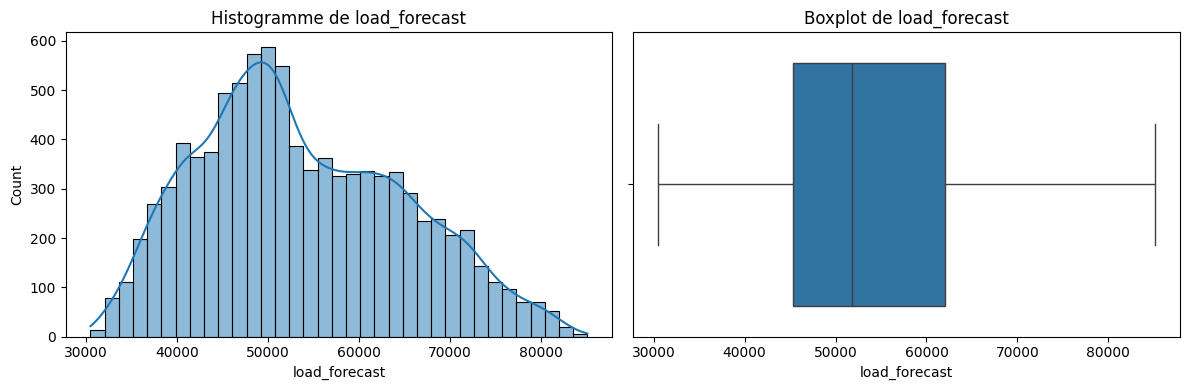

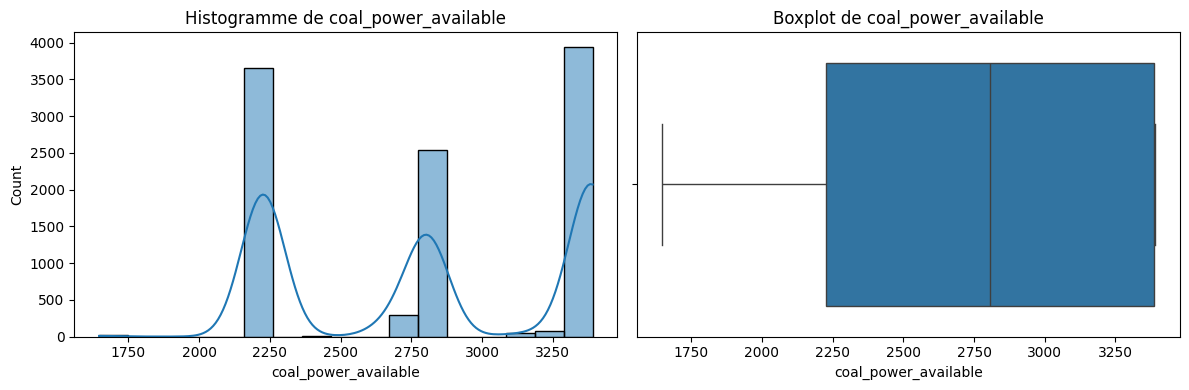

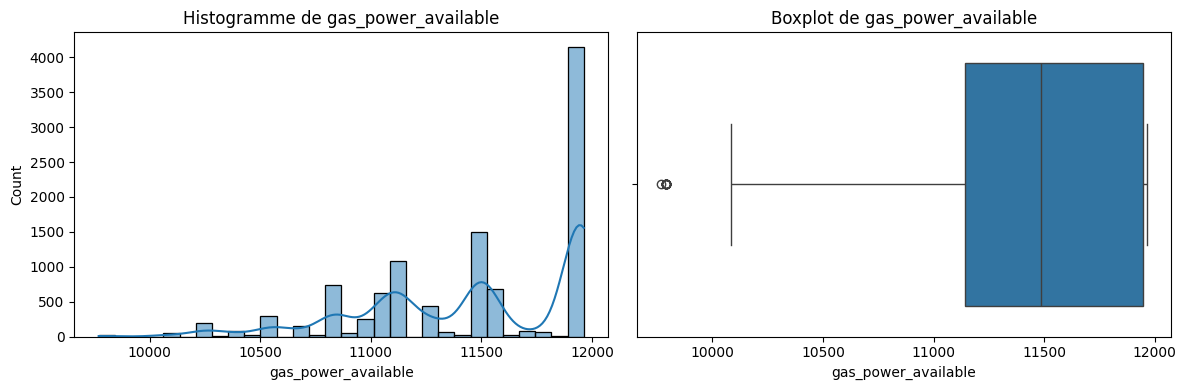

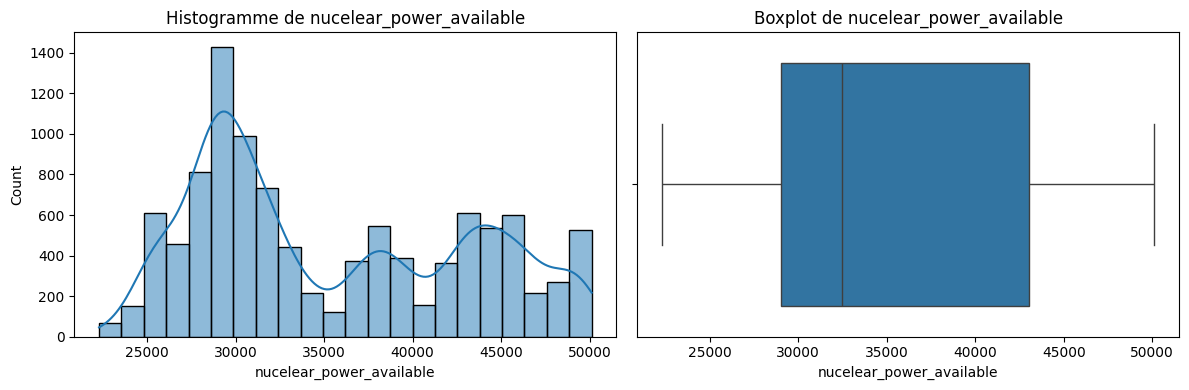

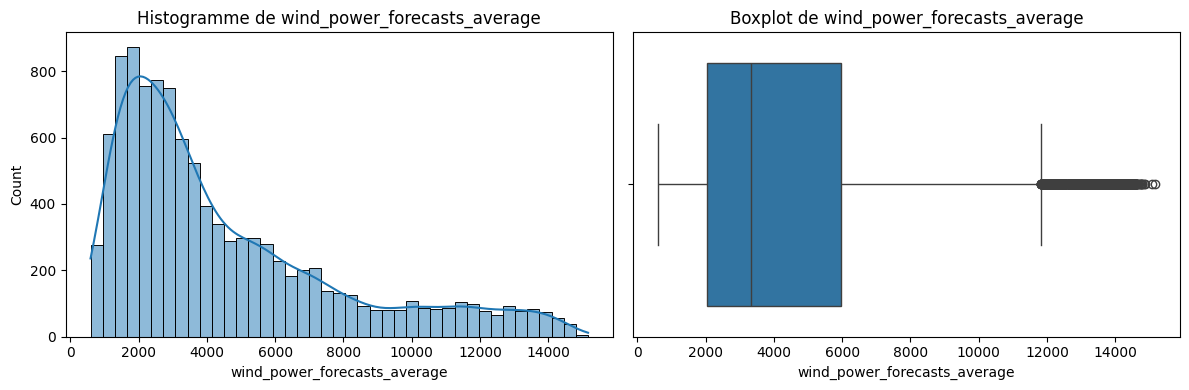

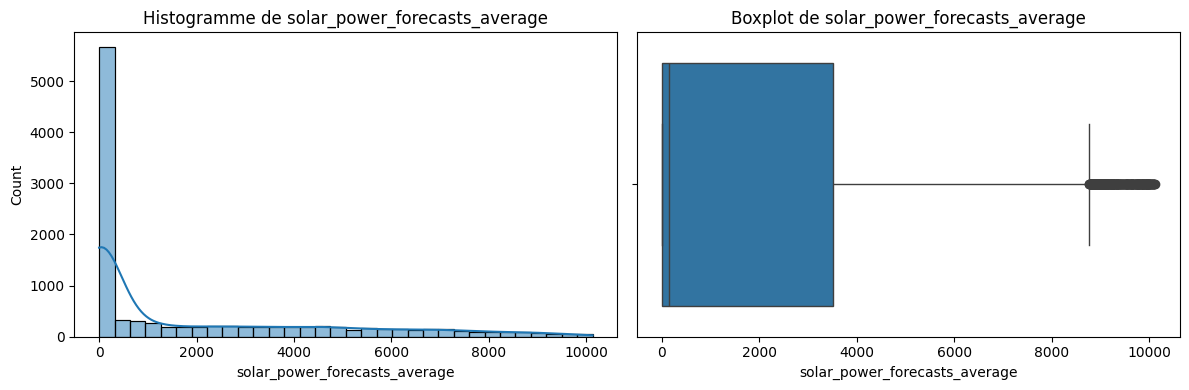

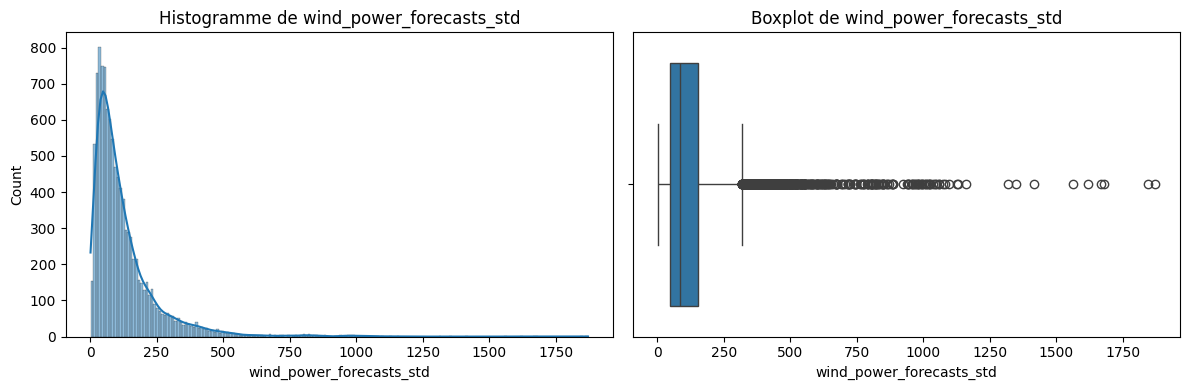

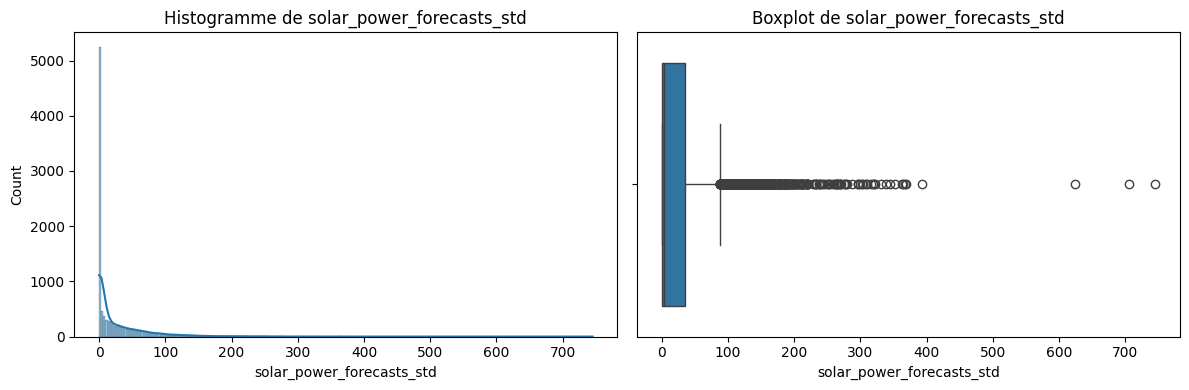

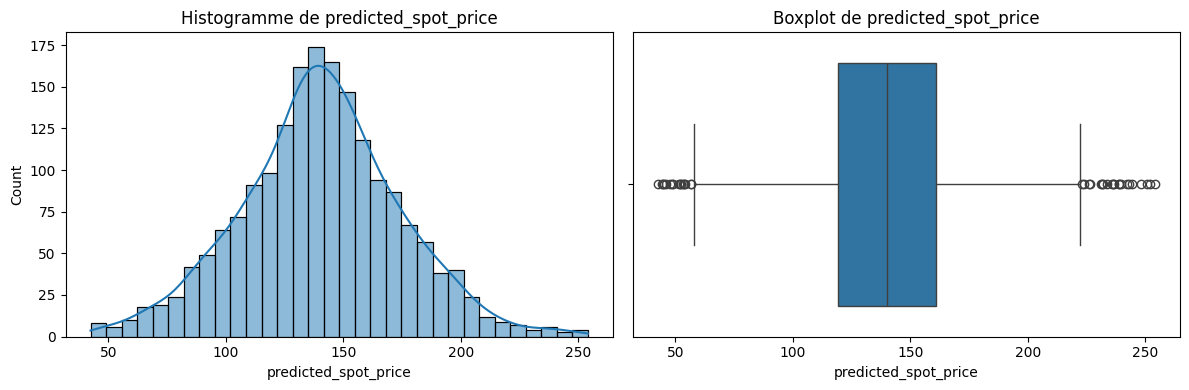

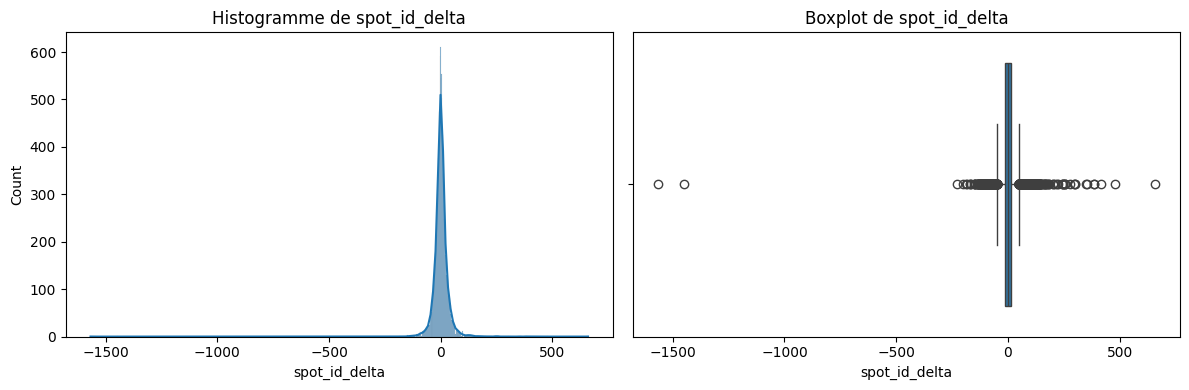

In [11]:
numeric_columns = data.columns
preprocessing_functions.plot_hist_and_box(data, numeric_columns)

- load_forecasts : distribution goes from 30000 to 80000. The repartition is balanced, with a mode around 50000. There is no outliers.
- coal_power_available : We have 3 main types of value which can be described as low production (2250), mid production (2800) and high production (3300). Values seem well balanced between those 3 types of production.
- gas_power_avaiable : Values go from 0 to 12000. The repartition is not uniform, we have 3 peaks (around 11000, 11500 and 12000). The last one is the max. Some very low values may be considered as outliers.
- nuclear_power_available : Distribution presents values from 22000 to 50000. We have a mode around 30000, then values are quite balanced. No outliers.
- wind_power_forecasts_average : Values from 500 to 15000. We have a peak around 2000, then values are decreasing in a regular way until 15000. Values over 12000 may be considered as outliers, however they follow the same kind of distribution as the previous ones.
- solar_power_forecasts_average : Strong peak at 0, then the repartition is decreasing until 10000. This feature is very different during the day and the night.
- wind_power_foreacsts_std : First the distribution looks like a normal one, with a mean around 100. But values increase until 1800, which presents many outliers. That mean fluctuation in wind production sometime during an hour can go very high.
- solar_power_forecasts_std : As the solar average, many values are fixed at 0, which represents the night.
- predicted_spot_price : We have a nice normal distribution, with a mean around 140.
- spot_id_delta : it seems to have a normal centered distribution, but we have some uncommon outliers around -1500 for negatives, and 500 for positive.  
  
Let's check the correlation between the different parameters and the target variable :

<Axes: >

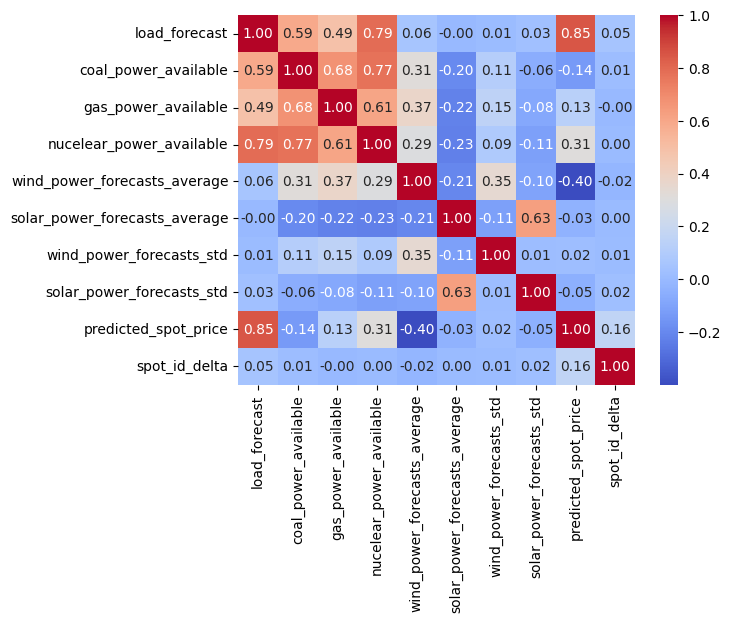

In [12]:
import seaborn as sns
sns.heatmap(data.corr(), fmt = '.2f', annot = True, cmap = "coolwarm")

- Power_available parameters and load_forecast are highly correlated : when the consumption forecast is high, the 3 main production means are pushed at their maximum.
- Wind average and std are correlated (0.35), such as solar average and std (0.63).
- Wind features are linked with 3 "power_available", meaning that when gas, coal and nuclear are high, wind is high too.
- However, the 3 sames features are anti-correlated with solar production.
- Predicted_spot_price model is highly linked with load_forecast, nuclear and wind productions.
- The target spot_id_delta is not correlated with any of the features. The only one over 0.1 is predicted_spot_price.  
  
Let's explore the test_set, which must be used to make predictions and be evaluated according to the challenge :

In [13]:
X_test = pd.read_csv('X_test_GgyECq8.csv', sep = ";")

In [14]:
X_test.info()
X_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 4942 non-null   object 
 1   load_forecast                  4942 non-null   int64  
 2   coal_power_available           4942 non-null   int64  
 3   gas_power_available            4942 non-null   int64  
 4   nucelear_power_available       4942 non-null   int64  
 5   wind_power_forecasts_average   4942 non-null   int64  
 6   solar_power_forecasts_average  4918 non-null   float64
 7   wind_power_forecasts_std       4942 non-null   float64
 8   solar_power_forecasts_std      4918 non-null   float64
 9   predicted_spot_price           3406 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 386.2+ KB


,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
count,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4918.000000,4942.000000,4918.000000,3406.000000
mean,42386.116350,2382.153379,11094.512950,37282.897005,3818.613314,3134.489833,144.196701,40.568289,93.771315
std,5685.395405,351.924703,401.952057,2904.153457,2583.846656,3711.832188,157.021294,62.940926,28.485096
min,27775.000000,1646.000000,9807.000000,30189.000000,633.000000,0.000000,1.329160,0.000000,-11.550000
25%,38084.500000,2226.000000,10902.000000,35418.000000,1861.000000,0.000000,52.211631,0.000000,76.615000
50%,42515.000000,2226.000000,11060.000000,37021.500000,3071.500000,961.000000,95.618431,11.275333,93.285000
75%,46722.500000,2226.000000,11487.000000,38905.000000,5183.000000,6418.750000,180.384245,58.232935,111.702500
max,64772.000000,3386.000000,11952.000000,44155.000000,14875.000000,12057.000000,2034.570413,587.386991,216.070000


As the previous set, values are missing in solar production (14 for both) and in predicted_spot_price (1500).

In [15]:
X_test = preprocessing_functions.extract( X_url = 'X_test_GgyECq8.csv')

In [16]:
print(f"The data are collected every hour from the {X_test.index.min()} to the {X_test.index.max()}.")
print("Test set is 6-month long, following the period of time of the train set.")

The data are collected every hour from the 2023-04-01 22:00:00+00:00 to the 2023-10-24 21:00:00+00:00.
Test set is 6-month long, following the period of time of the train set.


<Axes: >

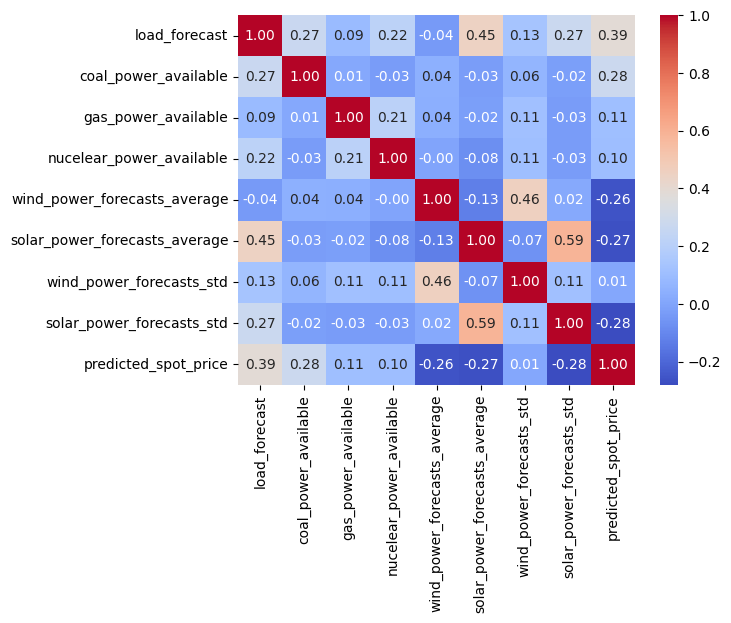

In [17]:
sns.heatmap(X_test.corr(), fmt = '.2f', annot = True, cmap = "coolwarm")

For the test set, we don't find the same correlation between values as the train set.  
Load_forecast and power_available are not correlated anymore. We have a new correlation between load_forecast and solar_average.  
Predicted_spot_price is still correlated with some other features, but not the same as the train set.  
  
Let's try to understand this :

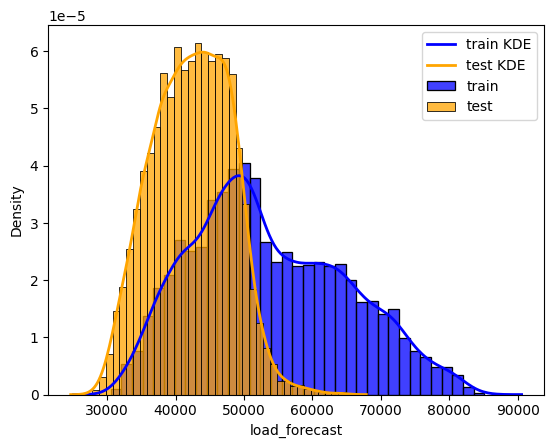

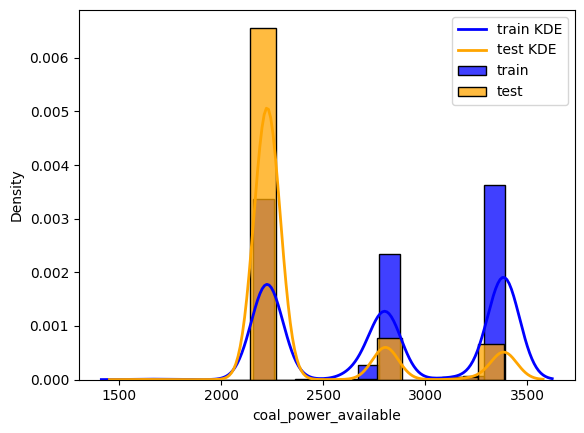

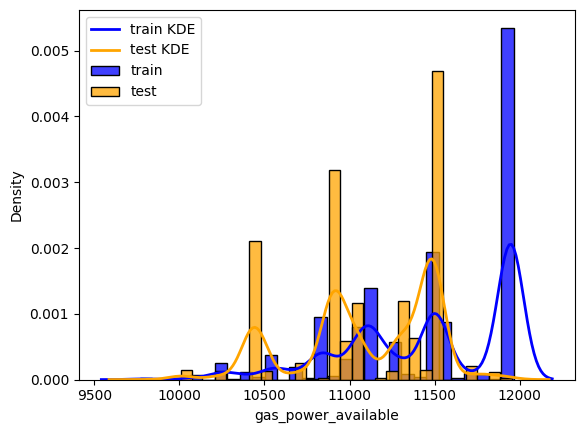

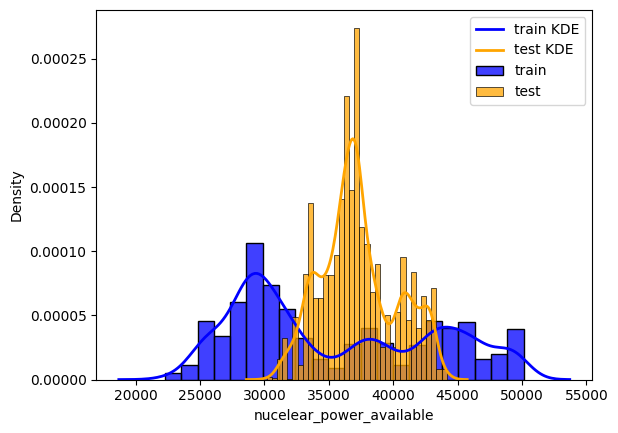

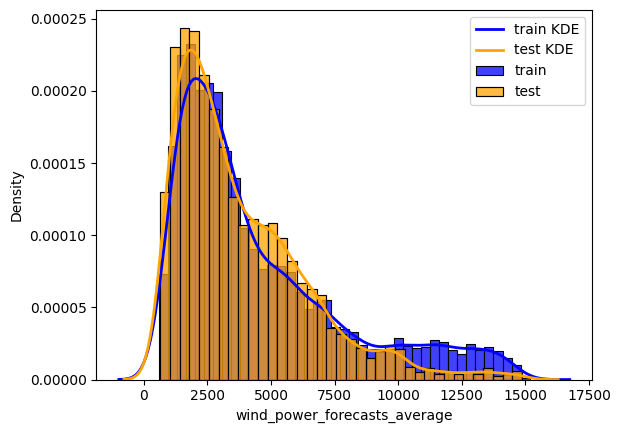

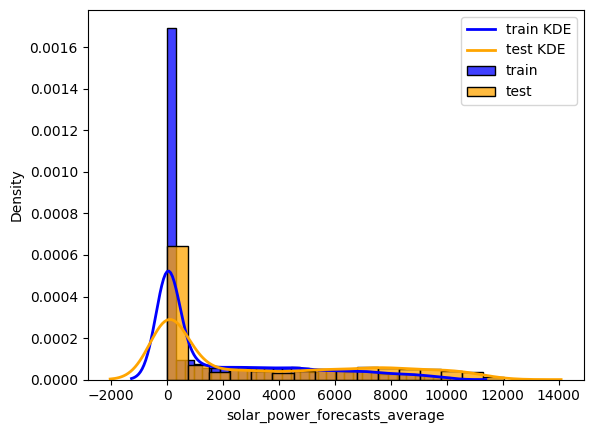

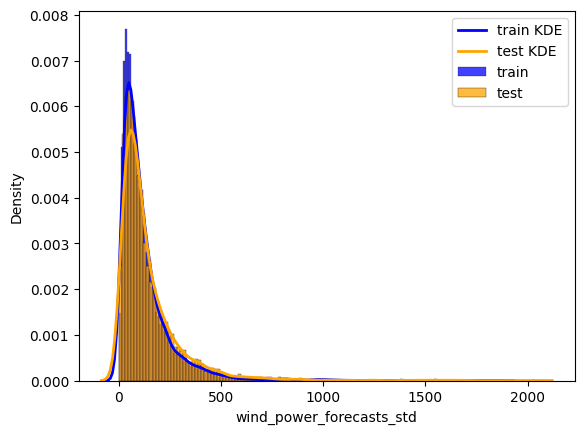

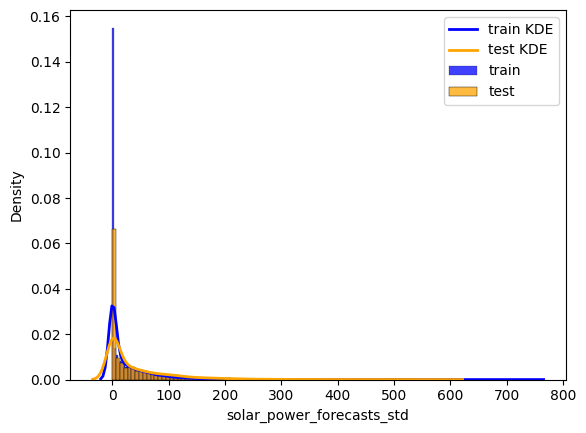

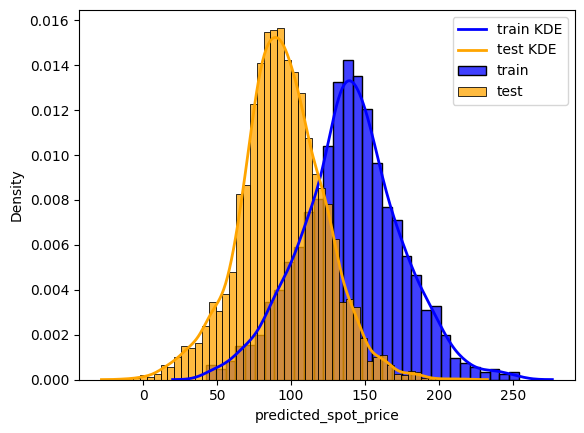

In [18]:
numeric_columns = X_test.columns
preprocessing_functions.compare_train_test(data, X_test)

Actually, distributions are very different for train and test sets, that's why correlations are not the same for those sets. Distributions haven't the same shape for load_forecast and power_available parameters. For features about renewable energies, distributions are more similar. For predicted_spot_price, they are quite the same, but not centered on the same value (150 for train, 90 for test).  
Those differences in distribution should be the difference of period for train and test set. Train set represents 14 months, whereas test set represents only 6 months of warm season. That can explains such a difference between features.

## First model

### Preprocessing
Let's begin with dropping missing values, and delete predicted_spot_price column, since there are only 10% of values.  
For outliers, we will use a Z-test for spot_id_delta because distribution seems to be normal. We won't delete any values for other features, because train and test sets reach nearly the same high values, so training on high values on the train set may be useful for evaluation on the test set.

In [19]:
train_data = preprocessing_functions.extract("X_train_Wwou3IE.csv", "y_train_jJtXgMX.csv", sep = ',')
train_data = preprocessing_functions.handle_missing(train_data, na = 'drop', to_drop = ['predicted_spot_price'])
train_data = preprocessing_functions.detect_outliers_Z(train_data, 'spot_id_delta', plot = False)
train_data.info()

#numeric_columns = train_data.columns
#preprocessing_functions.plot_hist_and_box(train_data, numeric_columns)


76 outliers for feature spot_id_delta
Number of dropped values : 76
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2022-01-01 01:00:00+00:00 to 2023-03-29 21:00:00+00:00
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   load_forecast                  9193 non-null   float64
 1   coal_power_available           9193 non-null   float64
 2   gas_power_available            9193 non-null   float64
 3   nucelear_power_available       9193 non-null   float64
 4   wind_power_forecasts_average   9193 non-null   float64
 5   solar_power_forecasts_average  9193 non-null   float64
 6   wind_power_forecasts_std       9193 non-null   float64
 7   solar_power_forecasts_std      9193 non-null   float64
 8   spot_id_delta                  9193 non-null   float64
dtypes: float64(9)
memory usage: 718.2 KB


/Users/hugobonfils/Data Science/Projet perso/Challenge énergie/functions/preprocessing_functions.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anomalies = [(i, y[i], z[i]) for i in range(len(y)) if np.abs(z[i]) > threshold]


### Predictions
Let's get a first baseline using some machine learning models.  
It is important not to shuffle data when we split it inton train/test, to reproduce challenge evaluation conditions. In this way, the test set follow the train one, such as evaluation data.  
We begin by using only some features, which seems to be interesting according to their distribution.

In [20]:
from sklearn.model_selection import train_test_split

mask = train_data["solar_power_forecasts_average"] == 0
train_data['solar_working'] = ~mask

y = train_data['spot_id_delta']
X = train_data.drop(['coal_power_available', 'gas_power_available', 'nucelear_power_available', 'solar_power_forecasts_average', 'solar_power_forecasts_std', 'spot_id_delta'], axis = 1)


In [21]:
from sklearn.metrics import make_scorer
challenge_score = make_scorer(ML_functions.weighted_accuracy)

#forest, KNN = ML_functions.fit_models(X, y, verbose = 1, score = challenge_score)
#ML_functions.fit_models(X, y, verbose = 1, score = challenge_score)

Model is just a bit better than the random situation, not depending on the model. Let's try to work on features and preprocessing to improve performances.

## 2nd model
There are many missing values on load_forecast feature. It seems to be correlated with the timestamp (Is it winter ? Is it weekend ? Is it day or night ?).  
Let's try to extract some features from timestamps to predict missing values of load_forecast. Maybe those new features will be useful too for our challenge model.

/Users/hugobonfils/Data Science/Projet perso/Challenge énergie/functions/preprocessing_functions.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anomalies = [(i, y[i], z[i]) for i in range(len(y)) if np.abs(z[i]) > threshold]


113 outliers for feature spot_id_delta
Number of dropped values : 113


<Axes: >

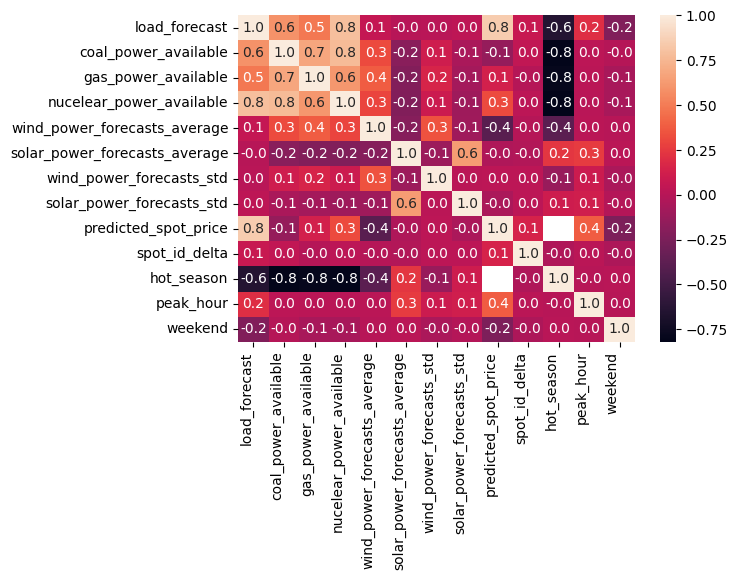

In [2]:
import seaborn as sns
train_data = preprocessing_functions.extract("X_train_Wwou3IE.csv", "y_train_jJtXgMX.csv", sep = ',')
train_data = preprocessing_functions.detect_outliers_Z(train_data, 'spot_id_delta', plot = False)

train_data['load_forecast'].plot()

start_hot = "04-01"
end_hot = "10-30"
train_data['hot_season'] = (train_data.index.strftime("%m-%d") >= start_hot) & (train_data.index.strftime("%m-%d") <= end_hot)

train_data['peak_hour'] = (train_data.index.hour >= 8) & (train_data.index.hour <= 13) | (train_data.index.hour >= 17) & (train_data.index.hour <= 24)

train_data['weekend'] = train_data.index.dayofweek.isin([5, 6])

sns.heatmap(train_data.corr(), annot = True, fmt = '.1f')

New features, such as power_available features are correlated with load_forecast. Let's try to predict load_forecast missing values with those features.

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
import numpy as np

load_missing = train_data[train_data['load_forecast'].isna()]
load_missing = load_missing['load_forecast']


load_present = train_data[~train_data['load_forecast'].isna()]
load_present = load_present['load_forecast']

'''
y_train = load_present['load_forecast']
X_train = load_present.drop(['load_forecast'], axis = 1)
'''
#best_models = ML_functions.fit_models(X_train, y_train, verbose = 1, score = 'neg_mean_squared_error', models = ['SVM', 'regression'])

"\ny_train = load_present['load_forecast']\nX_train = load_present.drop(['load_forecast'], axis = 1)\n"

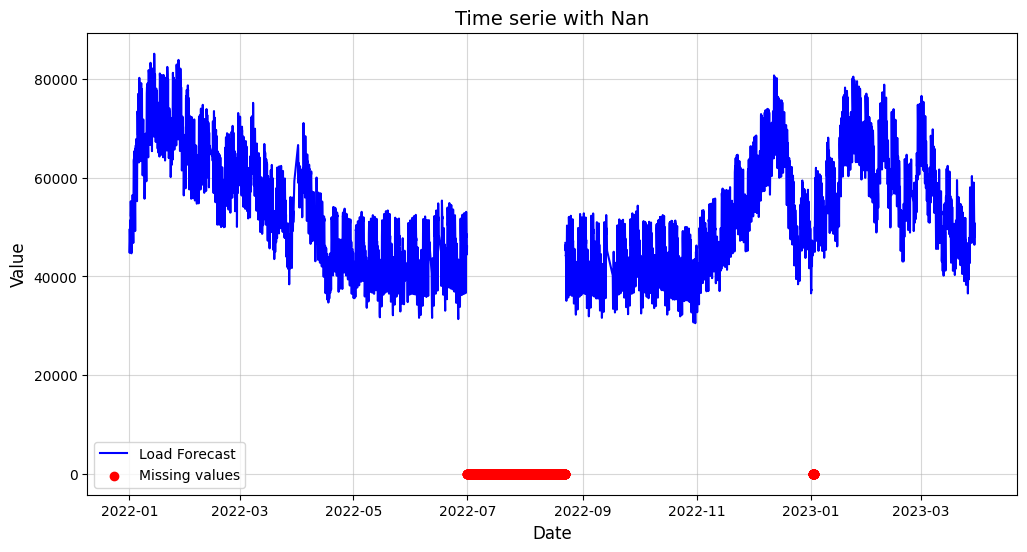

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['load_forecast'].index, train_data['load_forecast'], label="Load Forecast", color="blue")

# Ajouter un marqueur pour les valeurs manquantes
plt.scatter(train_data['load_forecast'].index[train_data['load_forecast'].isna()], 
            [0] * train_data['load_forecast'].isna().sum(), 
            color="red", label="Missing values", zorder=3)

# Améliorer l'affichage
plt.title("Time serie with Nan", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [25]:
load_missing

DELIVERY_START
2022-06-30 22:00:00+00:00   NaN
2022-06-30 23:00:00+00:00   NaN
2022-07-01 00:00:00+00:00   NaN
2022-07-01 01:00:00+00:00   NaN
2022-07-01 02:00:00+00:00   NaN
                             ..
2023-01-02 18:00:00+00:00   NaN
2023-01-02 19:00:00+00:00   NaN
2023-01-02 20:00:00+00:00   NaN
2023-01-02 21:00:00+00:00   NaN
2023-01-02 22:00:00+00:00   NaN
Name: load_forecast, Length: 1241, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler

# Mise à l'échelle des données (entre 0 et 1)
scaler = StandardScaler()
scaler.fit(load_present.values.reshape(-1, 1))
present_scaled = scaler.transform(load_present.values.reshape(-1, 1))

#missing_scaled = scaler.fit_transform(load_missing.values.reshape(-1, 1))


In [31]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [32]:
sequence_length = 30  # Longueur de la fenêtre
X_present, y_present = create_sequences(present_scaled, sequence_length)

# Fractionnement en données d'entraînement et de test
split = int(0.8 * len(X_present))
X_train, X_test = X_present[:split], X_present[split:]
y_train, y_test = y_present[:split], y_present[split:]

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=False, input_shape = (sequence_length,1)),
    Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=16)

Epoch 1/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.2185 - val_loss: 0.0429
Epoch 2/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0294 - val_loss: 0.0274
Epoch 3/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0181 - val_loss: 0.0190
Epoch 4/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0156 - val_loss: 0.0176
Epoch 5/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0144 - val_loss: 0.0167
Epoch 6/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0132 - val_loss: 0.0156
Epoch 7/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0129 - val_loss: 0.0148
Epoch 8/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 9/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 10/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 11/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0077 - val_loss: 0.0100
Epoch 12/15
461/461 ━━━━━━━━━━━━━━━━━━━━

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


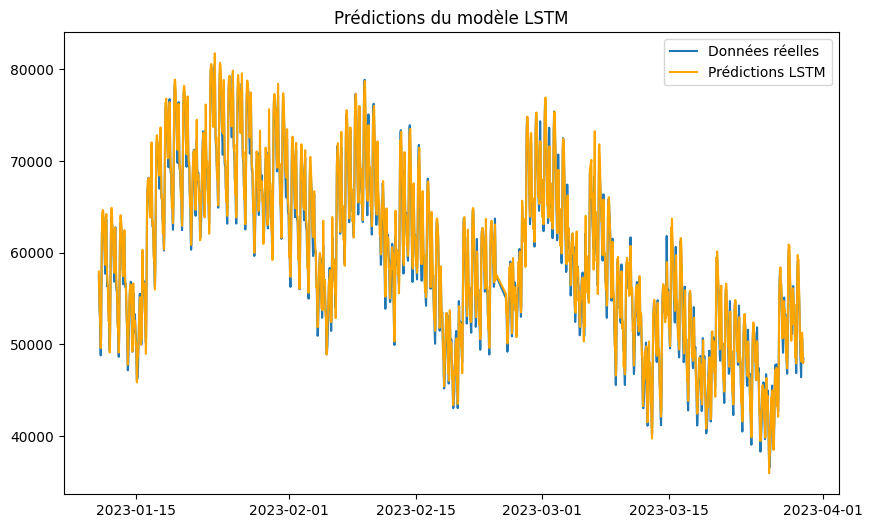

In [35]:
y_pred = model.predict(X_test)

# Inversion de la mise à l'échelle pour interprétation
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(load_present.index[-len(y_test):], y_test_rescaled, label="Données réelles")
plt.plot(load_present.index[-len(y_test):], y_pred_rescaled, label="Prédictions LSTM", color='orange')
plt.title("Prédictions du modèle LSTM")
plt.legend()
plt.show()

In [36]:
load_forecast = train_data['load_forecast']
load_forecast_scaled = scaler.transform(load_forecast.values.reshape(-1, 1))

def predict_nan(data, sequence_length, model):
    data_copy = data.copy()

    for i in range(len(data_copy) - sequence_length):
        X = data_copy[i:i+sequence_length]
        X = X.reshape((1,-1,1))
        y = data_copy[i+sequence_length]
        #print(y)
        
        if np.isnan(y[0]) :
            y = model.predict(X)
            print(y)
            data_copy[i+sequence_length] = model.predict(X)
        
    return data_copy

prediction = predict_nan(load_forecast_scaled, sequence_length, model)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[-0.97104263]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[-1.1884197]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[-1.3013903]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[-1.4389209]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[-1.4817618]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[-1.3551584]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[-1.0430673]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[-0.6280498]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[-0.30890366]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[-0.12940654]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[-0.0266978]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83m

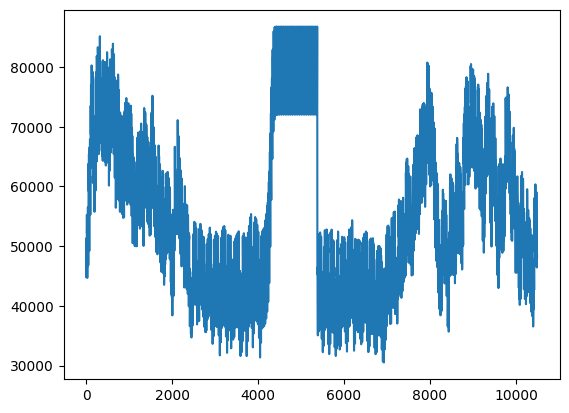

In [37]:
load_forecast_rescaled = scaler.inverse_transform(prediction)
plt.plot(load_forecast_rescaled)

We observe a slight decrease in autocorrelation, which means the serie is not stationnary. This fact is confirmed by the serie graph, which presents a seasonnality.

In [8]:
from sktime.forecasting.bats import BATS
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(load_present, test_size=168)

forecaster = BATS(use_box_cox=True,
                  use_trend=True,
                  use_damped_trend=False,
                  sp=[24, 168])
forecaster.fit(y_train)
y_pred_BATS = forecaster.predict(y_test)

KeyboardInterrupt: 

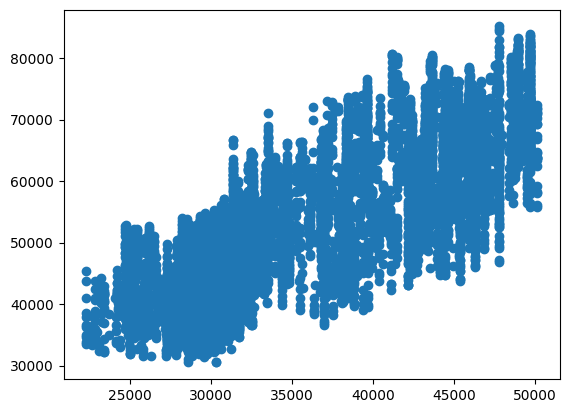

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(load_present['nucelear_power_available'], load_present['load_forecast'])

In [ ]:
KNN = KNeighborsRegressor()
KNN.set_params(**best_params)
KNN.fit(X_train, y_train)
#ML_functions.print_scores(X_train, y_train, X_test, y_test, forest)

NameError: name 'best_params' is not defined

In [ ]:
pred = KNN.predict(load_missing)
#df_full.loc[df_full['predicted_spot_price'].isna(), 'predicted_spot_price'] = pred
pred

array([49426.2, 49426.2, 41760.6, ..., 58640.3, 58640.3, 58640.3])